In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [3]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('Bigmart.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2099.333529
std,4.652502,0.051459,62.086938,8.371664,1542.432736
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,878.856000
50%,12.600000,0.054021,142.247000,1999.000000,1828.273366
75%,16.750000,0.094037,185.855600,2004.000000,2949.298043
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Cleaning


In [8]:
(df.isnull().sum()/df.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
df.shape

(14204, 12)

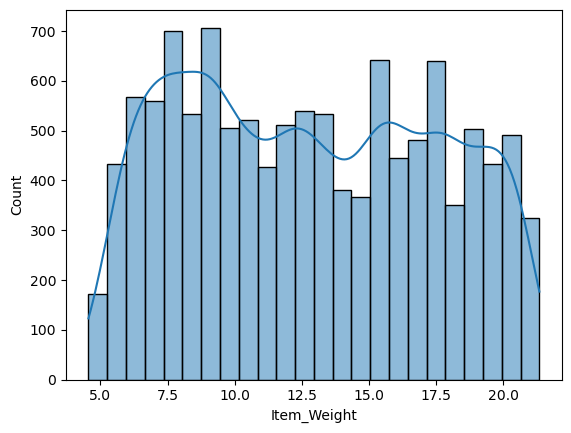

In [10]:
sns.histplot(df['Item_Weight'],kde = True)
plt.show()

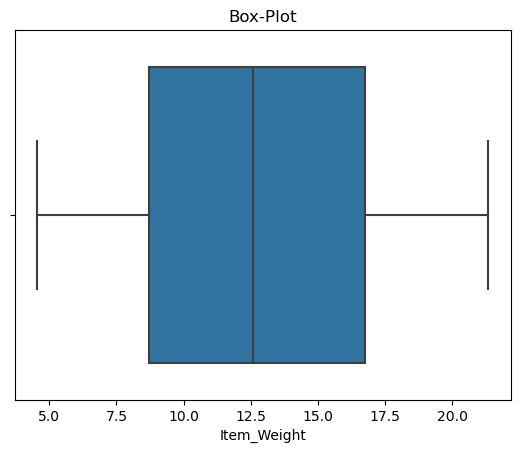

In [11]:
plt.title('Box-Plot')
sns.boxplot(df['Item_Weight'])
plt.show()

In [12]:
df['Item_Weight'].skew()

0.10130935278560388

In [13]:
item_Weight_mean = df['Item_Weight'].mean()
item_Weight_mean

12.792854228644991

In [14]:
df['Item_Weight'].fillna(item_Weight_mean,inplace = True)

In [15]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10188 entries, 0 to 14200
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            10188 non-null  object 
 1   Item_Weight                10188 non-null  float64
 2   Item_Fat_Content           10188 non-null  object 
 3   Item_Visibility            10188 non-null  float64
 4   Item_Type                  10188 non-null  object 
 5   Item_MRP                   10188 non-null  float64
 6   Outlet_Identifier          10188 non-null  object 
 7   Outlet_Establishment_Year  10188 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       10188 non-null  object 
 10  Outlet_Type                10188 non-null  object 
 11  Item_Outlet_Sales          10188 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [20]:
df_num = df.select_dtypes(include='float64')
df_cat = df.select_dtypes(include='object')

In [21]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
4,8.930,0.000000,53.8614,994.7052
5,10.395,0.000000,51.4008,556.6088


In [22]:
df_cat.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,10188,10188,10188,10188,10188,10188,10188
unique,1559,5,16,7,3,3,4
top,NCF19,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,7,6082,1443,1559,4655,4658,6203


# Outliers Detection and Treatment


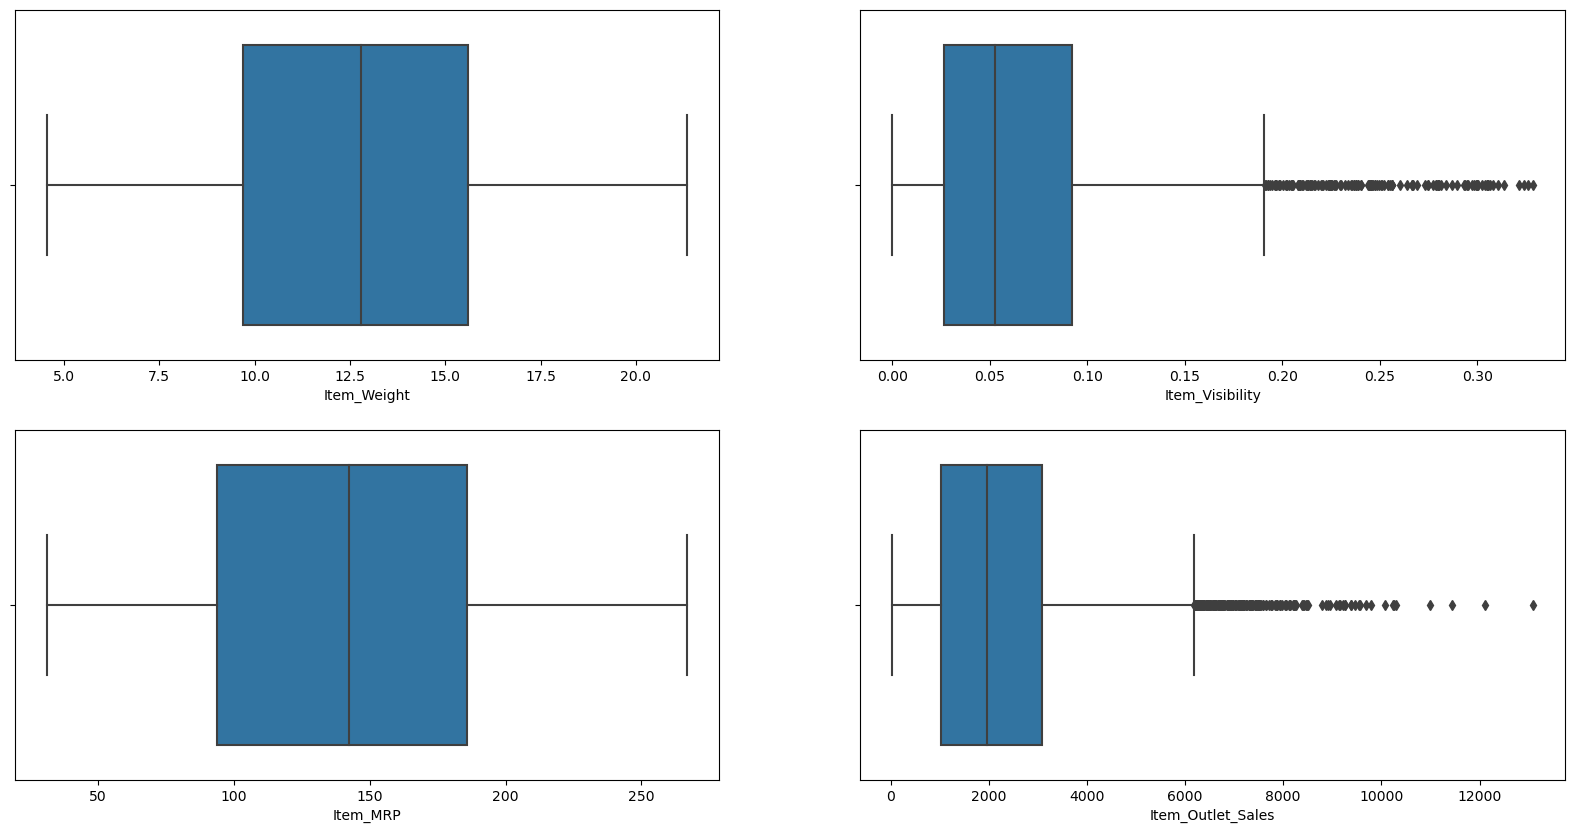

In [23]:
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
sns.boxplot(df_num['Item_Weight'])

plt.subplot(2,2,2)
sns.boxplot(df['Item_Visibility'])

plt.subplot(2,2,3)
sns.boxplot(df['Item_MRP'])

plt.subplot(2,2,4)
sns.boxplot(df['Item_Outlet_Sales'])





plt.show()

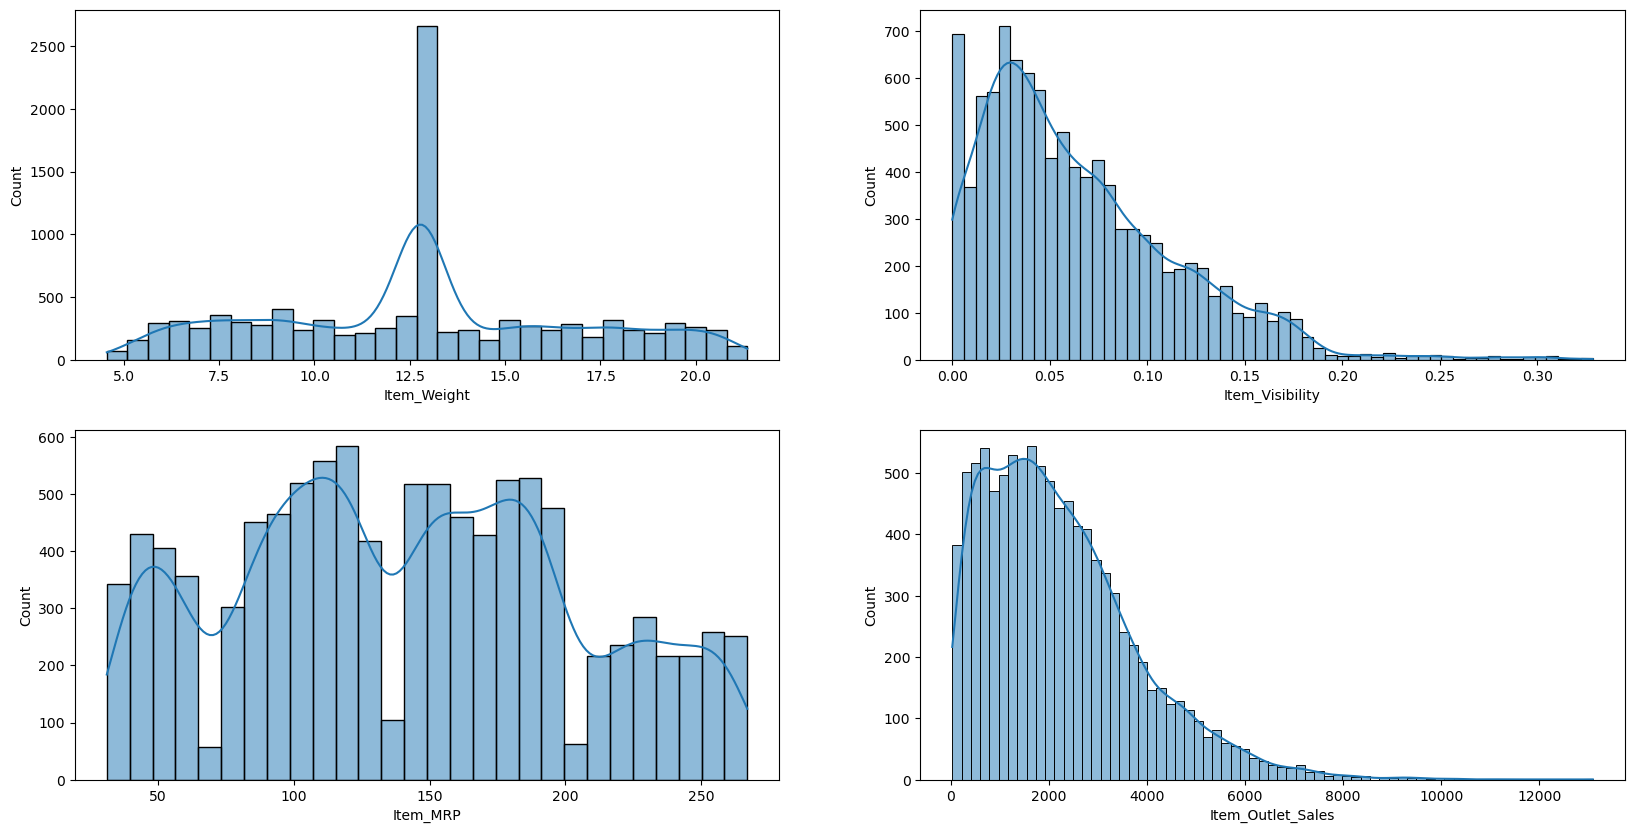

In [24]:
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
sns.histplot(df_num['Item_Weight'],kde=True)

plt.subplot(2,2,2)
sns.histplot(df['Item_Visibility'],kde=True)

plt.subplot(2,2,3)
sns.histplot(df['Item_MRP'],kde=True)

plt.subplot(2,2,4)
sns.histplot(df['Item_Outlet_Sales'],kde=True)
plt.show()

In [25]:
q1 = np.quantile(df['Item_Outlet_Sales'],0.25)
q3 = np.quantile(df['Item_Outlet_Sales'],0.75)
iqr = q3 - q1
upper = q1 + 1.5*iqr
lower = q3 - 1.5*iqr


In [26]:
df[df['Item_Outlet_Sales']> upper]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.350000,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.522800
55,FDK21,7.905000,Low Fat,0.010053,Snack Foods,249.0408,OUT018,2009,Medium,Tier 3,Supermarket Type2,6258.520000
58,FDY21,15.100000,Low Fat,0.173481,Snack Foods,194.5110,OUT046,1997,Small,Tier 1,Supermarket Type1,4910.275000
66,FDH19,19.350000,Low Fat,0.033082,Meat,172.5738,OUT035,2004,Small,Tier 2,Supermarket Type1,4865.666400
74,NCZ18,7.825000,low fat,0.186357,Household,254.3698,OUT049,1999,Medium,Tier 1,Supermarket Type1,5580.735600
...,...,...,...,...,...,...,...,...,...,...,...,...
14171,FDK26,12.792854,Regular,0.000000,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,4766.220532
14179,FDC39,12.792854,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,5211.795532
14180,FDU55,16.200000,Low Fat,0.035911,Fruits and Vegetables,261.3278,OUT046,1997,Small,Tier 1,Supermarket Type1,4380.725086
14192,FDN31,12.792854,Low Fat,0.072529,Fruits and Vegetables,188.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,4912.778372


In [27]:
q1 =df.quantile(0.25)
q3= df.quantile(0.75)
iqr=q3-q1

upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr

In [28]:
df = df[~((df < (lower_limit)) | (df > (upper_limit))).any(axis=1)]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9835 entries, 0 to 14200
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            9835 non-null   object 
 1   Item_Weight                9835 non-null   float64
 2   Item_Fat_Content           9835 non-null   object 
 3   Item_Visibility            9835 non-null   float64
 4   Item_Type                  9835 non-null   object 
 5   Item_MRP                   9835 non-null   float64
 6   Outlet_Identifier          9835 non-null   object 
 7   Outlet_Establishment_Year  9835 non-null   int64  
 8   Outlet_Size                9835 non-null   object 
 9   Outlet_Location_Type       9835 non-null   object 
 10  Outlet_Type                9835 non-null   object 
 11  Item_Outlet_Sales          9835 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 998.9+ KB


# Analyzing Categorical Variable


In [30]:
df_num = df.select_dtypes(include='float64')
df_cat = df.select_dtypes(include='object')

In [31]:
# dropping item_identifier column as it is redundant for our analysis
df_cat = df_cat.drop('Item_Identifier',axis=1)

In [32]:
df_cat.describe()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,9835,9835,9835,9835,9835,9835
unique,5,16,7,3,3,4
top,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,5877,1383,1536,4495,4501,6129


In [33]:
#Removing the item_identifier column

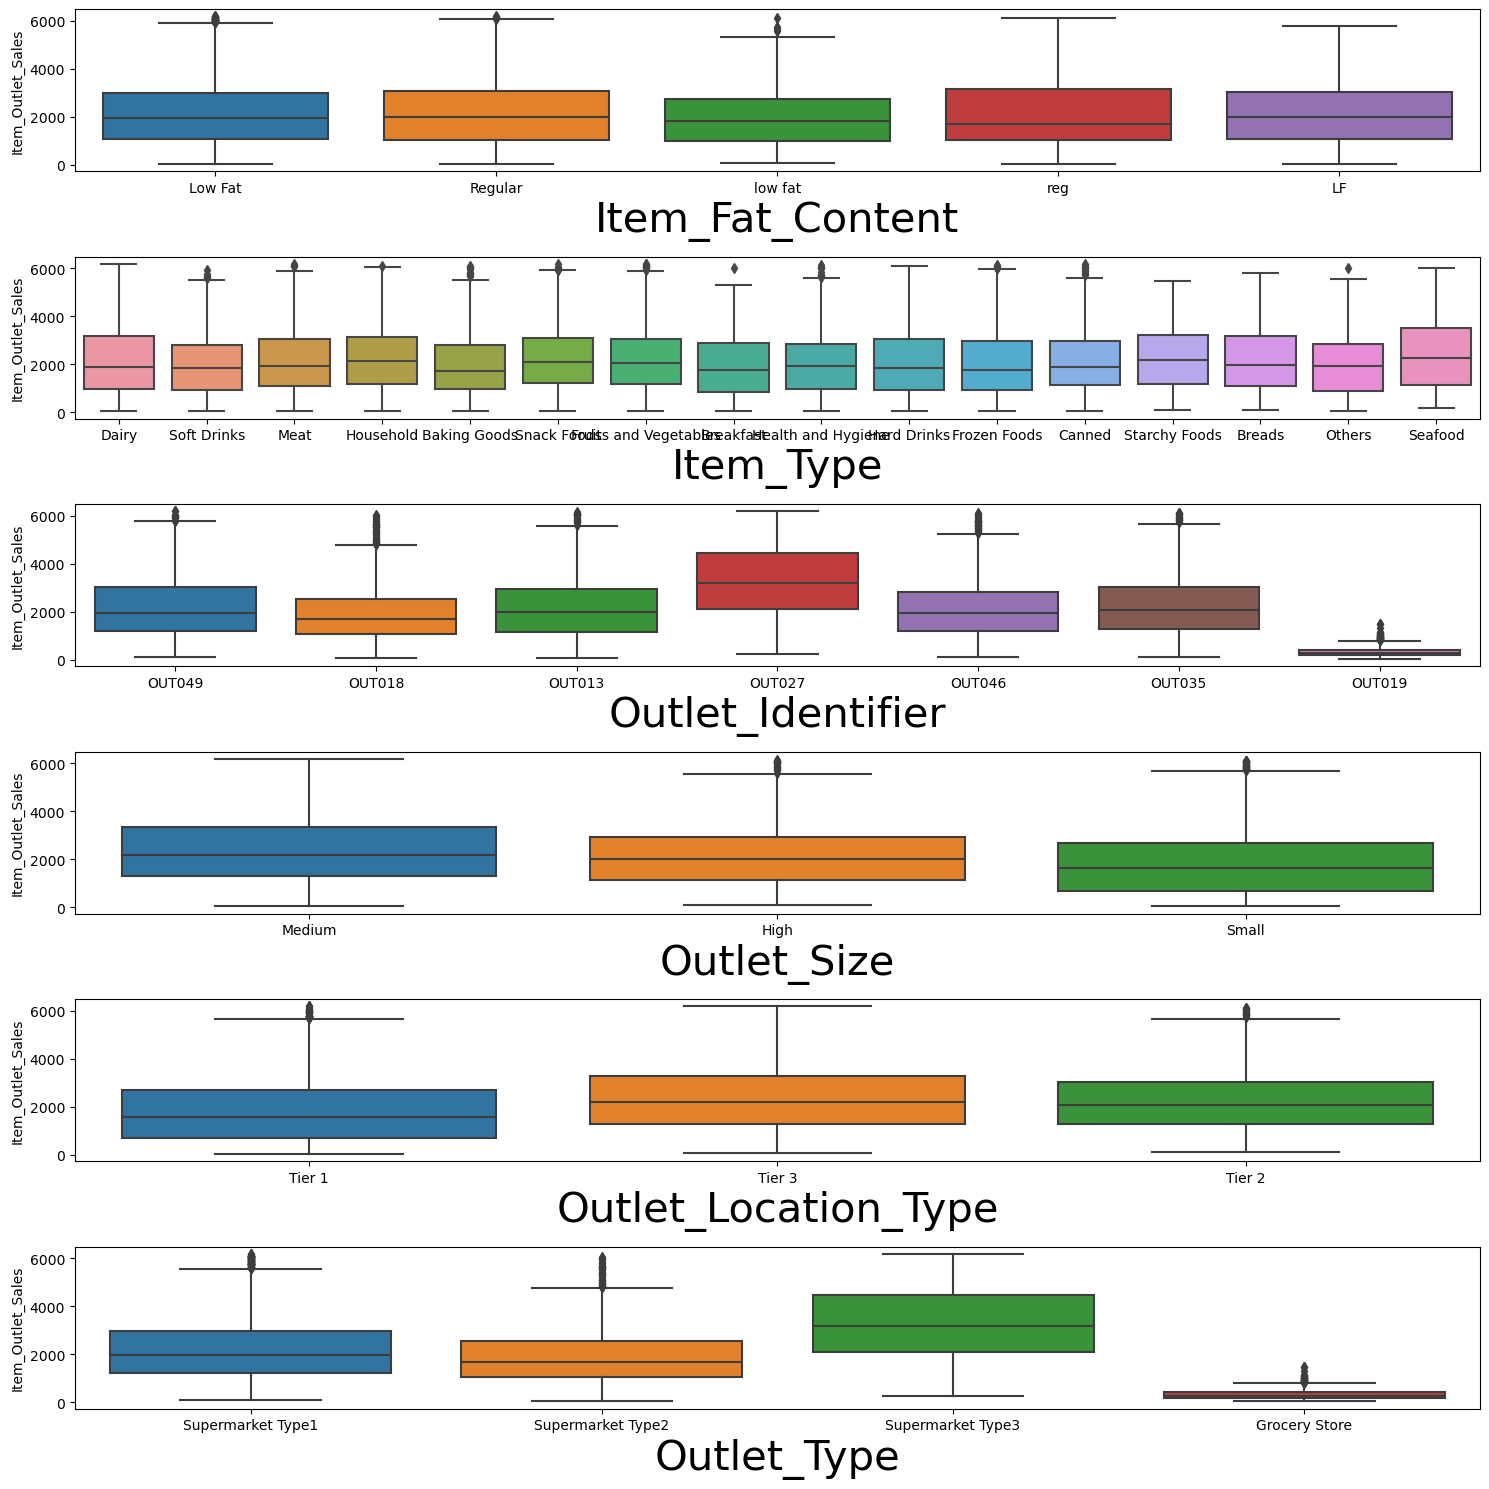

In [34]:
fig, ax = plt.subplots(6, 1, figsize=(15, 15))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(df_cat, ax.flatten()):
    
    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='Item_Outlet_Sales', data=df, ax=subplot)
    
    # set the x-axis labels 
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

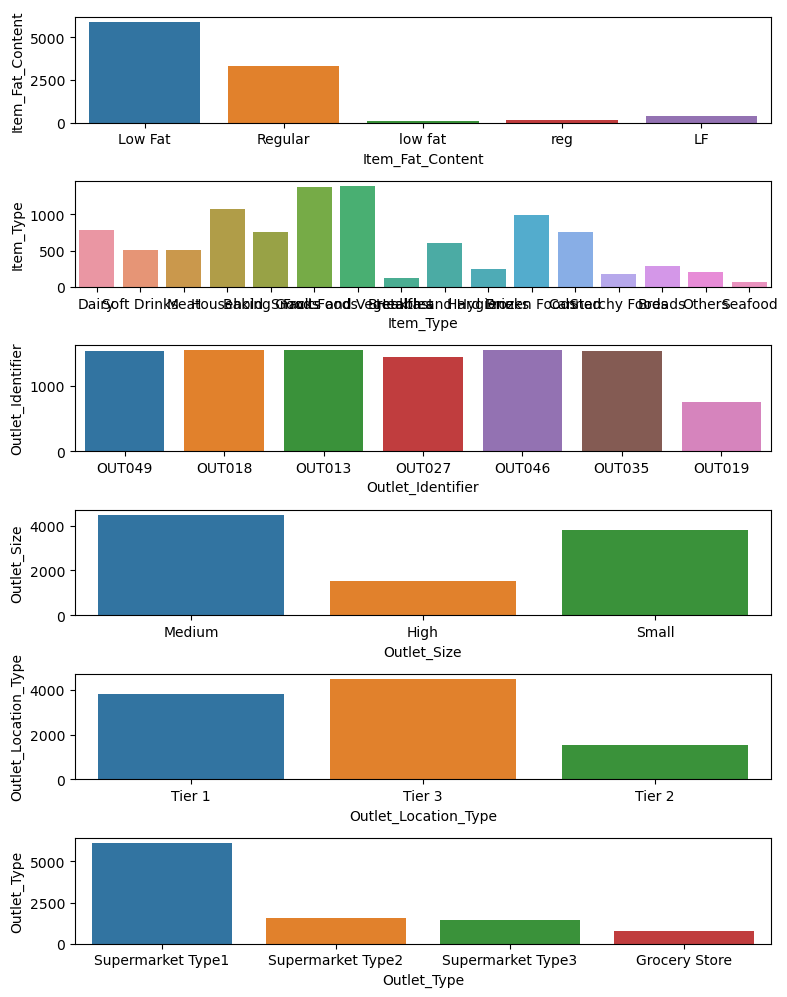

In [35]:
df_categoric_features = df.select_dtypes(include='category')

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(6, 1, figsize=(8, 10))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_cat, ax.flatten()):
    
    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(x=df[variable], ax=subplot )
       
    # set the y-axis labels 
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 10)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

# Analyzing Numeric Data

In [36]:
# generate the correlation matrix
corr =  df_num.corr()

# print the correlation matrix
corr

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.010552,0.033241,0.018574
Item_Visibility,-0.010552,1.000000,0.001452,-0.043648
Item_MRP,0.033241,0.001452,1.000000,0.636721
Item_Outlet_Sales,0.018574,-0.043648,0.636721,1.000000


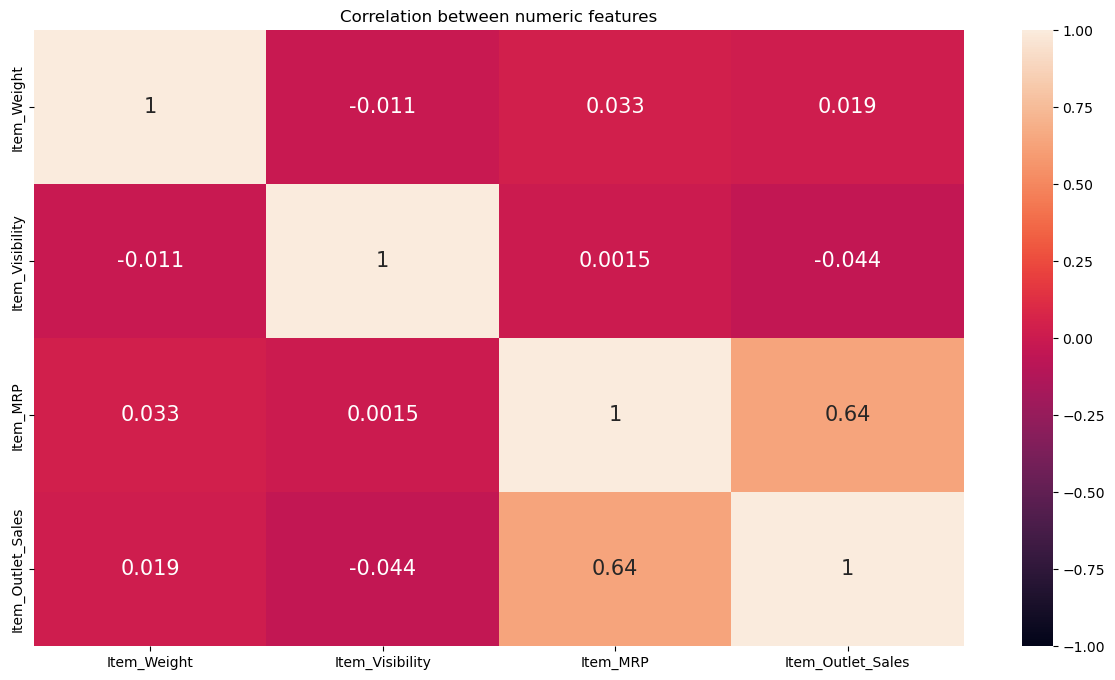

In [37]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True , annot_kws={"size": 15})

# cmap='YlGnBu'

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

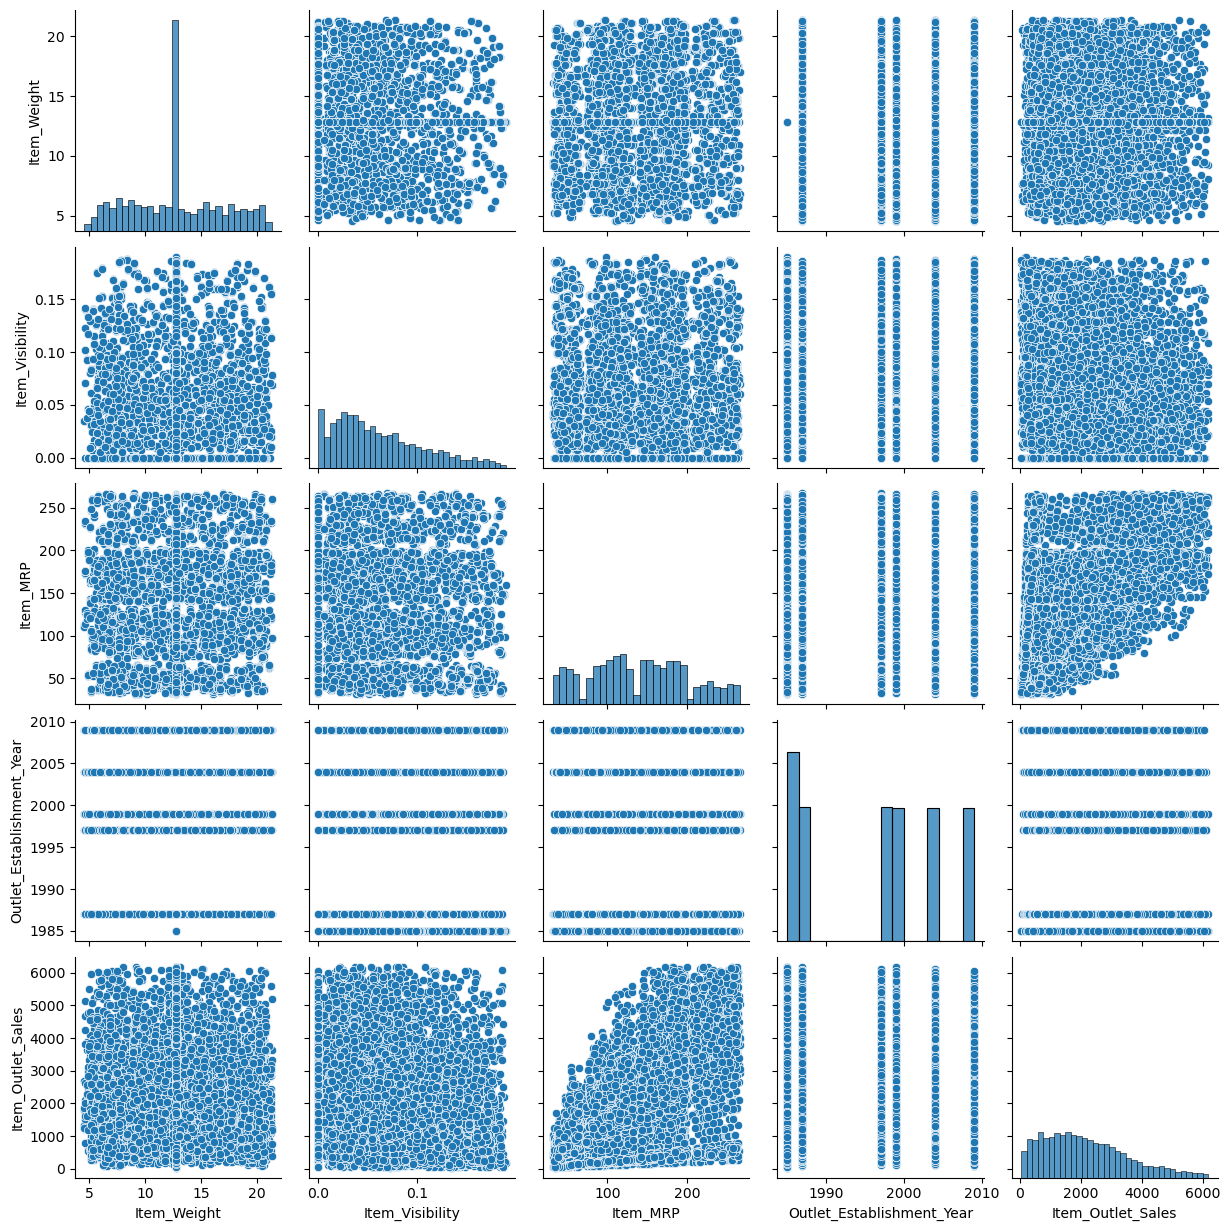

In [38]:
sns.pairplot(df)

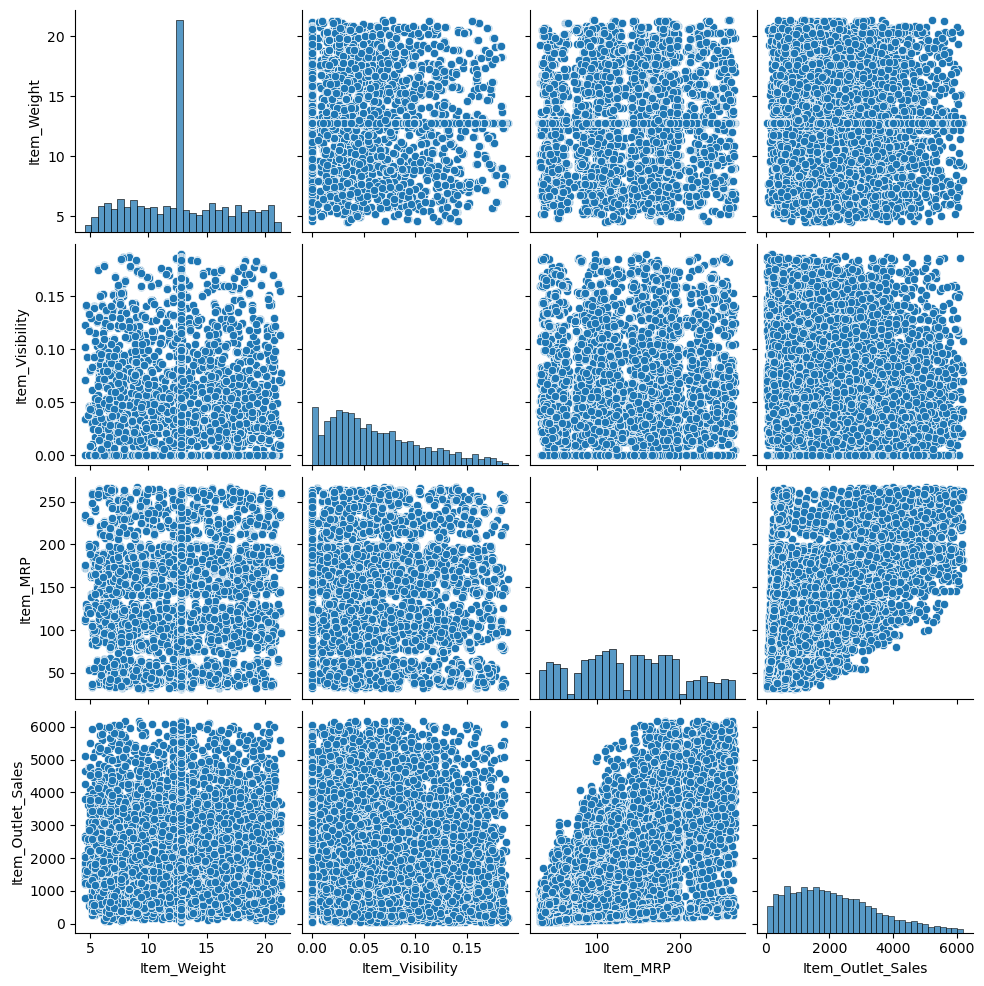

In [39]:
sns.pairplot(df_num)

# Preparing the Data

### Checking normality of the data

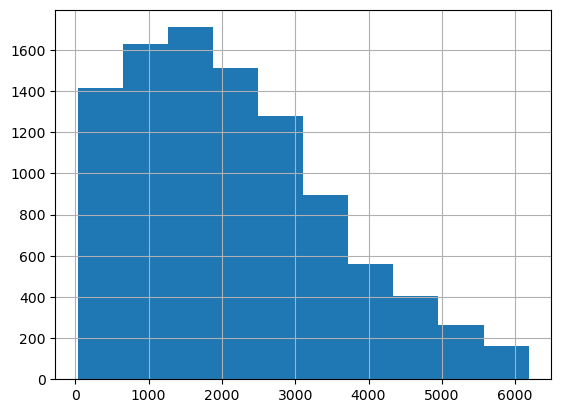

In [40]:
# check the distribution of target variable using hist()
df.Item_Outlet_Sales.hist()

# display the plot
plt.show()

From the above plot, we can notice that the variable 'charges' is heavily right skewed and not normally distributed

We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights

Let us perform the Jarque-Bera test to check the normality of the target variable.

The null and alternate hypothesis of Shapiro test are as follows:

H0: The data is normally distributed
H1: The data is not normally distributed

In [41]:
from scipy import stats
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = stats.shapiro(df["Item_Outlet_Sales"])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.955, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.

Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable.

Usually for testing the normality of data, the Shaprio Wilk Test is used. However, it does not work if the number of observations are more than 5000 inspite it being more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used. So we have used shapiro test

**If the data is not normally distributed, use log transformation to get near normally distributed data**

As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use np.log() to log transform the 'claim' variable. We also store the transformed variable into our data frame with a new name, 'log_charges'.

In [42]:
# log transformation for normality using np.log()
df_num['log_Item_Outlet_Sales'] = np.log(df_num['Item_Outlet_Sales'])

# display first 5 rows of the data
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,log_Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380,8.225540
1,5.920,0.019278,48.2692,443.4228,6.094524
2,17.500,0.016760,141.6180,2097.2700,7.648392
4,8.930,0.000000,53.8614,994.7052,6.902446
5,10.395,0.000000,51.4008,556.6088,6.321863


**Recheck for normality by plotting histogram and performing Jarque-Bera test**

Let us first plot a histogram of `log_Item_Outlet_Sales`

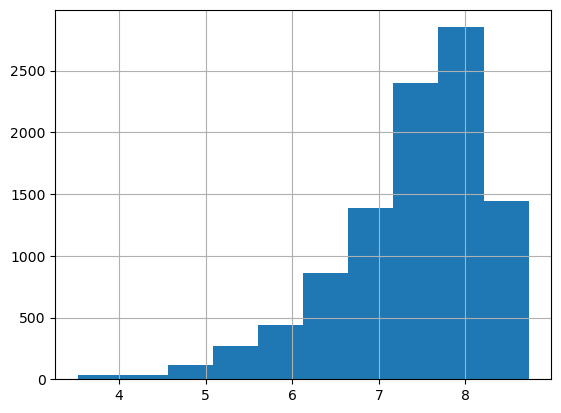

In [43]:
# recheck for normality 
# plot the histogram using hist
df_num.log_Item_Outlet_Sales.hist()

# display the plot
plt.show()

In [44]:
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from scipy import stats 


a, b = stats.boxcox(df_num['Item_Outlet_Sales'])
df_num['boxcox_Item_Outlet_Sales'] = a


In [45]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,log_Item_Outlet_Sales,boxcox_Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380,8.225540,104.369195
1,5.920,0.019278,48.2692,443.4228,6.094524,36.377970
2,17.500,0.016760,141.6180,2097.2700,7.648392,78.718100
4,8.930,0.000000,53.8614,994.7052,6.902446,54.495835
5,10.395,0.000000,51.4008,556.6088,6.321863,40.790775


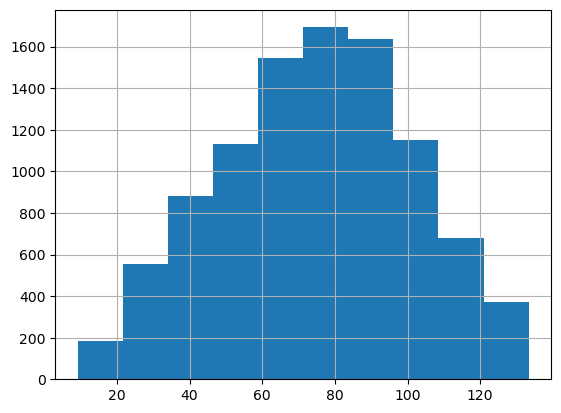

In [46]:
# recheck for normality 
# plot the histogram using hist
df_num.boxcox_Item_Outlet_Sales.hist()

# display the plot
plt.show()

It can be seen that the variable claim is near normally distributed. However we again confirm by Jarque Bera test

Let us perform Jarque Bera test

In [47]:
# recheck normality by Jarque-Bera test
# the test returns the the test statistics and the p-value of the test
statn, pv = jarque_bera(df_num['boxcox_Item_Outlet_Sales'])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.955, p-value=0.000
The data is not normally distributed (reject H0)


It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the claim
               
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs

In [48]:
df_num['boxcox_Item_Outlet_Sales'].skew()

-0.0957448388326199

### One-Way Anova

Here we want to find out whether outlet location type is significant in affecting Item sales

𝐻0
 : The averages of sales of all outlet types are the same.

𝐻1
: At least one outlet type has a different average sales.

In [49]:
f_oneway(df['Item_Outlet_Sales'][df['Outlet_Location_Type'] == 'Tier 1'], 
           df['Item_Outlet_Sales'][df['Outlet_Location_Type'] == 'Tier 2'],
            df['Item_Outlet_Sales'][df['Outlet_Location_Type'] == 'Tier 3'])

F_onewayResult(statistic=209.450332047402, pvalue=8.34290481966966e-90)

As p value is less than 0.05 so we reject the null hypothesis , this means that one of outlet type has different average sales 

We may consider building separate models for each outlet type. 

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [51]:
df_cat.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Dummy Encoding of Categorical Variables

To build linear regression models we use OLS method.It is seen that some variables are categorical. The OLS method fails to perform in presence of categorical variables. To overcome this we use dummy encoding

In [52]:
df_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2


In [53]:
 #create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_cat.columns.values:
    
    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_cat[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_cat = pd.concat([df_cat, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_cat.drop([col], axis=1, inplace=True)

In [54]:
df_cat.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [55]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_num, df_cat], axis=1)

# display data with dummy variables
df_dummy.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,log_Item_Outlet_Sales,boxcox_Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,8.225540,104.369195,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,6.094524,36.377970,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,7.648392,78.718100,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,8.930,0.000000,53.8614,994.7052,6.902446,54.495835,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,10.395,0.000000,51.4008,556.6088,6.321863,40.790775,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


Thus we have obtained the dummy coded variables.
                        
Note: Now the categorical variables are dummy encoded creating n-1 variables for each categorical variables, where n is the number of classes in each categorical variable. So for variable 'region', which has 4 levels, it has created 3 dummy encoded variables. Similarly, variable 'smoker' has 2 levels and it has created 1 dummy encoded variable.

## MLR Full Model

In [56]:
df_feature = df_dummy.drop(['log_Item_Outlet_Sales','boxcox_Item_Outlet_Sales','Item_Outlet_Sales'], axis = 1)


df_target = df_dummy['boxcox_Item_Outlet_Sales']

In [57]:
# set of independent variables
# create a copy of 'df_feature' and store in the dataframe 'X_full'

X= df_feature.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model

import statsmodels.api as sm
X= sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=1, 
                                                    test_size = 0.3)



In [58]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_full_model.summary())

                               OLS Regression Results                               
Dep. Variable:     boxcox_Item_Outlet_Sales   R-squared:                       0.720
Model:                                  OLS   Adj. R-squared:                  0.719
Method:                       Least Squares   F-statistic:                     631.1
Date:                      Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                              18:52:42   Log-Likelihood:                -27976.
No. Observations:                      6884   AIC:                         5.601e+04
Df Residuals:                          6855   BIC:                         5.621e+04
Df Model:                                28                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

**Interpretation:** The R-squared value obtained from this model is 0.72 which means that the above model explains a 72% of the variation in the Item_Outlet_Sales.<br> 

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the Durbin-Watson is near 2 (1.998) . This means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

Also, the 'Cond. No' (1.09e+16) represents the `Condition Number (CN)` that is used to check the multicollinearity. 

If CN < 100: no multicollinearity.<br> 
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

#  Variance Inflation Factor (VIF)

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

Steps to calculate VIF:<br>
1. Regress one independent variable (say V<sub>i</sub>) on all the remaining independent variables (say V<sub>j</sub>, j ≠ i)
2. Calculate R-squared of the regression model
3. Calculate VIF for the variable V<sub>i</sub> using the formula:
<p style='text-indent:29em'> <strong> VIF = 1 / (1 - R-squared)</strong>  </p><br>
4. Repeate the steps 1 to 3 to calculate VIF of each independent variable

In [59]:
df_feature.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,8.930,0.000000,53.8614,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,10.395,0.000000,51.4008,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [60]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,log_Item_Outlet_Sales,boxcox_Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380,8.225540,104.369195
1,5.920,0.019278,48.2692,443.4228,6.094524,36.377970
2,17.500,0.016760,141.6180,2097.2700,7.648392,78.718100
4,8.930,0.000000,53.8614,994.7052,6.902446,54.495835
5,10.395,0.000000,51.4008,556.6088,6.321863,40.790775


In [61]:
df_vif = df_num.copy()

In [62]:
col = df_vif.columns

##### Featutre Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
df_vif[col] = StandardScaler().fit_transform(df_vif[col])


In [64]:
df_vif.drop(['Item_Outlet_Sales','log_Item_Outlet_Sales'],inplace=True,axis=1)

In [65]:
df_vif.drop('boxcox_Item_Outlet_Sales',inplace=True,axis=1)

Working of VIF
------------------------
	1. It never includes your target. Because, we want all the predictors to have good relationship with the target. We are only referring to X and not Y.
	2. Each variable will be considered as Target with the rest of the predictors as independent variables.
	3. This keeps happening till all the features are exhausted.
	4. R2 is calculated for each of the variable. This R2 is not of the Model.
	5. Value is replaced in VIF formula and calculated.
	6. VIF is calculated in the form of the table.
	7. VIF > 10 is considered to be highly correlated. Between 1-5 hardly collinear.
	8. Consider only the training data- xtrain and not target -y.


In [66]:
for ind in range(len(df_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)


    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  


    if (df_sorted.empty == False):
        df_vif = df_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor         Features
0    1.001219      Item_Weight
1    1.000115  Item_Visibility
2    1.001109         Item_MRP


**Interpretation** Now, we have all the variables with VIF less than 10. So, we can conclude that there is no multicollinearity in the data.<br>
We will use the above dataframe "df_vif" to build the MLR model with significant variables.

In [67]:
df_dummy2=  pd.concat([df_vif, df_cat], axis=1)

# display data with dummy variables
df_dummy2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.851942,-1.012717,1.800029,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,-1.675087,-0.941248,-1.483634,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1.145035,-0.996951,0.037285,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,-0.942050,-1.367690,-1.392521,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,-0.585273,-1.367690,-1.432611,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


### MLR Model using vif dataframe

In [68]:
df_feature = df_dummy2


df_target = df_dummy['boxcox_Item_Outlet_Sales']

In [69]:
X= df_feature.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model

import statsmodels.api as sm
X= sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=1, 
                                                    test_size = 0.3)



In [70]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model_vif = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_full_model_vif.summary())

                               OLS Regression Results                               
Dep. Variable:     boxcox_Item_Outlet_Sales   R-squared:                       0.720
Model:                                  OLS   Adj. R-squared:                  0.719
Method:                       Least Squares   F-statistic:                     609.1
Date:                      Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                              18:52:42   Log-Likelihood:                -27976.
No. Observations:                      6884   AIC:                         5.601e+04
Df Residuals:                          6854   BIC:                         5.622e+04
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

There is still a strong multi collinearity , now we have to remove some insignificant variable for reducing it.

## Model Evaluation

In [71]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [72]:
# predict the sales using predict()
predicted_claim = MLR_full_model_vif.predict(X_test)

# extract the sales values from the test data
actual_claim = y_test

In [73]:
# calculate rmse using rmse()
MLR_full_model_vif_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
MLR_full_model_vif_rsquared = MLR_full_model_vif.rsquared

# calculate Adjusted R-Squared using rsquared_adj
MLR_full_model_vif_rsquared_adj = MLR_full_model_vif.rsquared_adj 

In [74]:
# compile the required information
MLR_full_model_vif_metrics = pd.Series({
                     'Model_Name': "MLR_full_model_vif of target variable",
                     'RMSE':MLR_full_model_vif_rmse,
                     'R-Squared': MLR_full_model_vif_rsquared,
                     'Adj. R-Squared': MLR_full_model_vif_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(MLR_full_model_vif_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,MLR_full_model_vif of target variable,0.720454,0.719271,14.30621


As we can see that RMSE value 14.30621 , which is quite good now we will try to decrease by making other models .


## Stochastic Gradient Descent

Gradient Descent is an optimization technique in machine learning. It is an iterative method which is used to find the values of the parameters of a function that minimizes the cost function. The parameters are initially specified and from that, Gradient Descent is run in an iterative way to find the optimal values of the parameters.

For gradient decent we use the complete dataset to get the optimal in a less noisy or less random manner. But the problem arises when our datasets get really huge, say you have a million samples in your dataset, it becomes computationally very expensive to perform. This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample to perform each iteration. The sample is randomly shuffled and selected for performing the iteration. Here, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the optima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter because the path taken by the algorithm is not considered, as long as we reach the optima with significantly shorter training time.

Linear Regression with SGD

Let us now perform linear regression using SGD.

Now we perform Linear Regression using Stochastic Gradient Descent. We start with our original data set gradually proceeding with our analysis

In order to perform Linear Regression using Stochastic Gradient Descent, we do the following:

                    1. Fit the linear regression using the SGD

                    2. Predict the values using test set

                    3. Compute accuracy measures

                    4. Tabulate the results

### Feature Scaling


Scaling is important when performing gradient descent because it can significantly affect the convergence rate of the algorithm.

In general, the gradients of the cost function with respect to the parameters will be much larger in magnitude for features with a large range of values than for features with a small range of values. This means that the updates to the parameters during each iteration will be much larger for the features with a large range of values, which can make the optimization process converge very slowly or not converge at all.

To avoid this problem, it is common to scale the input features so that they all have a similar range of values. This way, the updates to the parameters during each iteration will be more consistent in magnitude, regardless of the feature. This can greatly accelerate the convergence of the optimization process and help the algorithm converge to a good solution.

It is also important to normalize the data before performing gradient descent because if we don't normalize the data and one of the feature has a large scale, it will dominate the cost function and the other feature will take more time to converge.

In [75]:
df_feature = df_dummy.drop(['log_Item_Outlet_Sales','boxcox_Item_Outlet_Sales','Item_Outlet_Sales'], axis = 1)


df_target = df_dummy['boxcox_Item_Outlet_Sales']

In [76]:
X_scaled = df_feature.copy()

In [77]:
y = df_target.copy()

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=1)

In [79]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,random_state=1)

In [80]:
X_train_scaled.shape,X_test_scaled.shape

((7376, 35), (2459, 35))

In [81]:
scaler_ind = StandardScaler()
scaler_ind.fit(X_train_scaled)

StandardScaler()

In [82]:
X_train_scaled = pd.DataFrame(scaler_ind.transform(X_train_scaled),columns=X_train_scaled.columns)

scaler_ind.fit(X_test_scaled)

X_test_scaled = pd.DataFrame(scaler_ind.transform(X_test_scaled),columns=X_test_scaled.columns)

In [83]:
# scaling the target variable
scaler_target = StandardScaler()
scaler_target.fit(np.array(y_train_scaled).reshape((-1,1)))
y_train_scaled = scaler_target.fit_transform(np.array(y_train_scaled).reshape((-1,1)))


scaler_target.fit(np.array(y_test_scaled).reshape((-1,1)))
y_test_scaled = scaler_target.fit_transform(np.array(y_test_scaled).reshape((-1,1)))

Fit the linear regression using the SGD

In [84]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# build the model
linreg_with_SGD = SGDRegressor()

# we fit our model with train data
linreg_with_SGD = linreg_with_SGD.fit(X_train_scaled, y_train_scaled)

Predict the values using test set

In [85]:
# we use predict() to predict our values
# Take the inverse of the prediction as we have done the transformation
linreg_with_SGD_predictions = scaler_target.inverse_transform(linreg_with_SGD.predict(X_test_scaled).reshape(-1,1))

Compute accuracy measures

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [86]:
# calculate mse by taking inverse of the data as we did scaling 
linreg_SGD_mse = mean_squared_error(y_test,linreg_with_SGD_predictions)

# calculate rmse
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)

# calculate R-squared
linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)

# calculate Adjusted R-squared
linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

Tabulate the results

In [87]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_rmse ,
                     'R-Squared': linreg_SGD_r_squared,
                     'Adj. R-Squared': linreg_SGD_adjusted_r_squared   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,MLR_full_model_vif of target variable,0.720454,0.719271,14.306210
1,Linear Regression SGD,0.698908,0.694559,14.434925


In [88]:
score_card.drop(1,axis=0,inplace=True)

In [89]:
score_card.reset_index(drop=True,inplace=True)

In [90]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,MLR_full_model_vif of target variable,0.720454,0.719271,14.30621


## Linear Regression with SGD using GridSearchCV

Now we show how a linear model is optimized by cross-validation, which is done using the 'sklearn.model_selection.GridSearchCV' object on a training set.

The performance of the selected hyper-parameters and trained model is then measured on the test set that was not used during the model building.

Now we perform Linear Regression using Stochastic Gradient Descent with GridSearchCV. We start with our original data set gradually proceeding with our analysis

In order to perform Linear Regression using Stochastic Gradient Descent with GridSearchCV, we do the following:

                    1. Fit the linear regression using the SGD with GridSearchCV

                    2. Predict the values using test set

                    3. Compute accuracy measures 

                    4. Tabulate the results

In [91]:
# to supress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import gridsearchcv from sklearn to optimize best parameter
from sklearn.model_selection import GridSearchCV

# Grid search 

# alpha is regularization term usually in the range 10.0**-np.arange(1,7).
# this will generate different alpha values like 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06

# loss="squared_loss": Ordinary least squares, 

# "l2": L2 norm penalty on coefficients (ridge regression), 
# "l1": L1 norm penalty on coefficients(lasso regression), "elasticnet": Convex combination of L2 and L1    
   
# The learning rate can be either constant or gradually decaying 
    
param_grid = { 'alpha': 10.0 ** -np.arange(1, 7), 
        
               'loss': ['squared_loss'], 
    
               'penalty': ['l2', 'l1', 'elasticnet'],
    
               'learning_rate': ['constant', 'optimal', 'invscaling']
}

# using sklearn’s GridSearchCV, we define our grid of parameters to search over and then run the grid search
reg = GridSearchCV(linreg_with_SGD, param_grid)

# fit the model on train data
reg.fit(X_train_scaled, y_train_scaled)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

Let us print the optimal parameters obtained by using GridSearchCV.

In [92]:
# print the best parameters
# print best alpha value
print('Best alpha:', reg.best_estimator_.alpha)

# print best tolerance
print('Best tol:', reg.best_estimator_.tol) 

# print best starting rate (Use eta0 to specify the starting learning)
print('Best eta0:', reg.best_estimator_.eta0)

# print best learning rate
print('Best learning rate:', reg.best_estimator_.learning_rate) 

Best alpha: 0.01
Best tol: 0.001
Best eta0: 0.01
Best learning rate: invscaling


In [93]:
# build the model using best parameters
# squared_loss: ordinary least squares loss
# 'eta0': specify the starting learning
linreg_SGD_using_best_parameter = SGDRegressor(alpha=0.0001,
                                               tol=0.001,
                                               eta0=0.01, 
                                               learning_rate='constant')

# fit the SGD model using best parameter
linreg_SGD_using_best_parameter.fit(X_train_scaled,y_train_scaled)

SGDRegressor(learning_rate='constant')

In [94]:
# predict the values on test data using predict
linreg_SGD_using_best_parameter_predictions =  scaler_target.inverse_transform(linreg_SGD_using_best_parameter.predict(X_test_scaled).reshape(-1,1))

In [95]:
# calculate mse
linreg_SGD_using_best_parameter_mse = mean_squared_error(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate rmse
linreg_SGD_using_best_parameter_rmse = np.sqrt(linreg_SGD_using_best_parameter_mse)

# calculate R-squared
linreg_SGD_using_best_parameter_r_squared = r2_score(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate Adjusted R-squared
linreg_SGD_using_best_parameter_adjusted_r_squared = 1 - (1-linreg_SGD_using_best_parameter_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [96]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_using_best_parameter_rmse ,
                     'R-Squared': linreg_SGD_using_best_parameter_r_squared,
                     'Adj. R-Squared': linreg_SGD_using_best_parameter_adjusted_r_squared   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,MLR_full_model_vif of target variable,0.720454,0.719271,14.306210
1,Linear Regression SGD,0.585454,0.579465,16.937588


## Feature Selection

Forward Selection

In [97]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished

[2023-04-30 18:53:15] Features: 1/5 -- score: 0.3894809173879892[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.2s finished

[2023-04-30 18:53:15] Features: 2/5 -- score: 0.6419452686161214[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished

[2023-04-30 18:53:16] Features: 3/5 -- score: 0.7124247561905159[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

<Figure size 5000x5000 with 0 Axes>

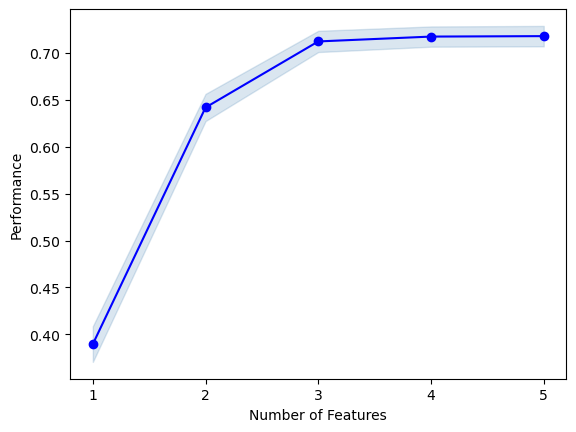

[('Item_MRP',
  'Outlet_Identifier_OUT018',
  'Outlet_Identifier_OUT019',
  'Outlet_Identifier_OUT027',
  'Outlet_Identifier_OUT035')]

In [98]:
reg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg, k_features = 5, forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs
plt.figure(figsize=(50,50))
fig1 = plt_sfs(sfs1.get_metric_dict(), kind= 'std_dev') 
plt.show()

result = pd.DataFrame(sfs1.get_metric_dict()).T
result = result[['feature_idx','avg_score','feature_names']]
imp_vars_forward = list(result.feature_names[result['avg_score'] == max(result.avg_score)])
imp_vars_forward

As we can see that after 3 features the model performance is not increasing significantly.

Let's also use Backward selection method

In [99]:
reg = LinearRegression()

# Build step forward feature selection
sfs2 = sfs(reg, k_features = 5, forward=False,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform Backward selection
sfs2 = sfs2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.1s finished

[2023-04-30 18:53:18] Features: 34/5 -- score: 0.7175129537063054[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.0s finished

[2023-04-30 18:53:19] Features: 33/5 -- score: 0.7177099691667259[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s finished

[2023-04-30 18:53:20] Features: 32/5 -- score: 0.7178716827194652[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [100]:
sfs2.k_feature_names_

('Item_MRP',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT035',
 'Outlet_Type_Supermarket Type2')

as there is only one feature in backward selection which is different from forward selection which is 'Outlet_Type_Supermarket Type2' inplace of Outlet_Identifier_OUT018.

Let make a model with best 5 feature selected by forward selection

In [101]:
imp_vars_forward = [imp_vars_forward[0][i] for i in range(len(imp_vars_forward[0]))]

In [102]:
# Let's build OLS model with best 20 features
linreg_model_with_forward_selection = sm.OLS(y_train, X_train[imp_vars_forward]).fit()

# to print the summary output
print(linreg_model_with_forward_selection.summary())

                                    OLS Regression Results                                   
Dep. Variable:     boxcox_Item_Outlet_Sales   R-squared (uncentered):                   0.938
Model:                                  OLS   Adj. R-squared (uncentered):              0.938
Method:                       Least Squares   F-statistic:                          2.222e+04
Date:                      Sun, 30 Apr 2023   Prob (F-statistic):                        0.00
Time:                              18:53:30   Log-Likelihood:                         -32481.
No. Observations:                      7376   AIC:                                  6.497e+04
Df Residuals:                          7371   BIC:                                  6.501e+04
Df Model:                                 5                                                  
Covariance Type:                  nonrobust                                                  
                               coef    std err          t   

Interpretation: The R-squared value obtained from this model is 0.938 which means that the above model explains a 93.8% of the variation in the Item_Outlet_Sales.
The Durbin-Watson test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the Durbin-Watson is (1.874) . This means there is positive autocorrelation.

The Jarque-Bera test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

Also, the 'Cond. No' (606) represents the Condition Number (CN) that is used to check the multicollinearity.

If CN < 100: no multicollinearity.
If CN is between 100 and 1000: moderate multicollinearity
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is moderate multicollinearity in the data.

As we can see that R2 and Adjusted R2 have increased significantly and both scores are exactly the same 0.938.

In [103]:
# predict the 'charges' using predict()
predicted_claim = linreg_model_with_forward_selection.predict(X_test[imp_vars_forward])

# extract the 'charges' values from the test data
actual_claim = y_test

In [104]:
# calculate rmse using rmse()
linreg_model_with_forward_selection_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_model_with_forward_selection_rsquared = linreg_model_with_forward_selection.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_forward_selection_rsquared_adj = linreg_model_with_forward_selection.rsquared_adj

In [105]:
# compile the required information
linreg_model_with_forward_selection = pd.Series({
                     'Model_Name': "linreg_model_with_forward_selection",
                     'RMSE': linreg_model_with_forward_selection_rmse,
                     'R-Squared': linreg_model_with_forward_selection_rsquared,
                     'Adj. R-Squared': linreg_model_with_forward_selection_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_model_with_forward_selection, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,MLR_full_model_vif of target variable,0.720454,0.719271,14.306210
1,Linear Regression SGD,0.585454,0.579465,16.937588
2,linreg_model_with_forward_selection,0.937778,0.937736,20.087764
